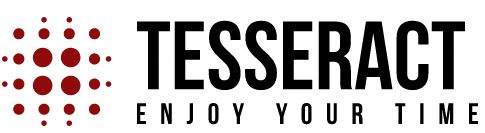



## To  Run this notebook 
# 1st Method:
Upload to Google drive all the dataset files, they can been downloaded from 
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/download?datasetVersionNumber=2
After the files were uploaded open a new Google Colab notebook and upload this notebook.
When "Steps to mount Google Drive File System" is executed, it will ask you for approval to connect to Google Drive

# 2nd Method:
Download the dataset in the same folder where is this notebook, change all the csv location from:

-------------------------------------------

df_customers = pd.read_csv(r"drive/MyDrive/dataset_final/olist_customers_dataset.csv")
df_geolocation = pd.read_csv(r"drive/MyDrive/dataset_final/olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(r"drive/MyDrive/dataset_final/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv(r"drive/MyDrive/dataset_final/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv(r"drive/MyDrive/dataset_final/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(r"drive/MyDrive/dataset_final/olist_orders_dataset.csv")
df_products = pd.read_csv(r"drive/MyDrive/dataset_final/olist_products_dataset.csv")
df_order_sellers = pd.read_csv(r"drive/MyDrive/dataset_final/olist_sellers_dataset.csv")
df_category_name_traslation = pd.read_csv(r"drive/MyDrive/dataset_final/product_category_name_translation.csv")

-------------------------------------------

to

-------------------------------------------
df_customers = pd.read_csv(r"olist_customers_dataset.csv")
df_geolocation = pd.read_csv(r"olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(r"olist_order_items_dataset.csv")
df_order_payments = pd.read_csv(r"olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv(r"olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(r"olist_orders_dataset.csv")
df_products = pd.read_csv(r"olist_products_dataset.csv")
df_order_sellers = pd.read_csv(r"olist_sellers_dataset.csv")
df_category_name_traslation = pd.read_csv(r"product_category_name_translation.csv")

-------------------------------------------

And skip the step "Steps to mount Google Drive..."

In [ ]:
# Steps to mount Google Drive File System
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pandas as pd

# Load all the csv files into dataframe objects
df_customers = pd.read_csv(r"drive/MyDrive/dataset_final/olist_customers_dataset.csv")
df_geolocation = pd.read_csv(r"drive/MyDrive/dataset_final/olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(r"drive/MyDrive/dataset_final/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv(r"drive/MyDrive/dataset_final/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv(r"drive/MyDrive/dataset_final/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(r"drive/MyDrive/dataset_final/olist_orders_dataset.csv")
df_products = pd.read_csv(r"drive/MyDrive/dataset_final/olist_products_dataset.csv")
df_order_sellers = pd.read_csv(r"drive/MyDrive/dataset_final/olist_sellers_dataset.csv")
df_category_name_traslation = pd.read_csv(r"drive/MyDrive/dataset_final/product_category_name_translation.csv")

In [ ]:
def eda_checking(data:object)->None:
  print("------------------")
  print(data.info())
  print("------------------")
  print(f"N of records:{len(data)}")
  print("------------------")
  for col in data.columns:
      print(f"N of unique records for column {col} :{len(data[col].unique())}")
  print("------------------")
  print("-------------NAN------")
  print(f"N of rows with any NAN {len(data[data.isna().any(axis=1)])}")     
  print(f"N of rows with all NAN {len(data[data.isna().all(axis=1)])}")      


  print(data.head())

In [ ]:
# Start checking customer csv file format
eda_checking(df_customers)


------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
------------------
N of records:99441
------------------
N of unique records for column customer_id :99441
N of unique records for column customer_unique_id :96096
N of unique records for column customer_zip_code_prefix :14994
N of unique records for column customer_city :4119
N of unique records for column customer_state :27
------------------
-------------NAN------
N of rows with any NAN 0
N of rows with all NAN 0
                    

In [ ]:

# Checking if there is any not alphabetical char in  customer_city
print(df_customers[df_customers['customer_city'].str.replace(" ","").str.isalpha() == False])


                            customer_id                customer_unique_id  \
227    d6b41b191f1f643ff583898156e049cf  3a62a4803c77457a96c996a9db36a662   
435    2122031cd11c82d905572a7958c2a117  4a362420541051d3d4055a777681ccbe   
682    0b169717fec8c12a53790ce862ee480c  25e1b5240ae610b163924a49e7e85bc6   
706    22a3b0e62211d8e0e28e374ce3cb6041  3f9d987156fddc08ef77f52d1a15c073   
1342   b58dcebd1080a35715998c1c6b9f4d81  99da196553d9b67b1c762a712a8caaf6   
...                                 ...                               ...   
98705  8fe1a699c51916b203ee684f642d234a  c0dca8f5338d0b4c4e9aebe9de1fd03e   
98831  cdd7ca4b71dd8f94507266b6c29b3165  c650ee502c6c1b12d65c8d0d81c066ce   
99216  94411d511cb2997df74f9984543492e9  b77a6fda8d224e6c228f95918b1d0855   
99322  10f6413b5b1071b6b46c72c05df6f4d6  baefaec72794d54a0aeaf7bb6203704b   
99427  592b8900e0e8325027d885e6d30d0283  57c2cfb4a80b13ed19b5fb258d29c19d   

       customer_zip_code_prefix          customer_city customer_state  
227

In [ ]:
# We check if there is any other special char than "-" or "'"
print(df_customers[df_customers['customer_city'].str.replace(" ","").str.replace("-","").str.replace("'","").str.isalpha() == False])

                           customer_id                customer_unique_id  \
6333  94ea98eea015faad90cd64998848d18d  0b7fea4fad79c46f6c10b848e20e9115   

      customer_zip_code_prefix           customer_city customer_state  
6333                     29735  quilometro 14 do mutum             ES  


As we can check the customer_unique_id has less unique rows than customer_id so we will drop it and use customer_id

In [ ]:
# Start checking geolocation csv file format
eda_checking(df_geolocation)


------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
------------------
N of records:1000163
------------------
N of unique records for column geolocation_zip_code_prefix :19015
N of unique records for column geolocation_lat :717360
N of unique records for column geolocation_lng :717613
N of unique records for column geolocation_city :8011
N of unique records for column geolocation_state :27
------------------
-------------NAN----

Following the Microstrategy Docs we are able to use the Lat Lon fields without any changes

https://www2.microstrategy.com/producthelp/Current/ProjectDesignGuide/WebHelp/Lang_1033/Content/Supporting_map_data_and_Geo_Location_.htm

In [ ]:

# The state column in sellers and in customers csv can't been removed due we have 5 records that has same zip code and city with different state

print(len(df_geolocation['geolocation_zip_code_prefix'].astype(str).str.cat(df_geolocation['geolocation_city']).str.cat(df_geolocation['geolocation_state']).unique()))
print(len(df_geolocation['geolocation_zip_code_prefix'].astype(str).str.cat(df_geolocation['geolocation_city']).unique()))


27912
27907


In [ ]:
# Start checking order items csv file format

eda_checking(df_order_items)

df_order_items.describe()

------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
------------------
N of records:112650
------------------
N of unique records for column order_id :98666
N of unique records for column order_item_id :21
N of unique records for column product_id :32951
N of unique records for column seller_id :3095
N of unique records for column shipping_limit_date :93318
N of unique records for column price 

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
# The order_item_id could be removed there is no relevant information on this column, also the shipping_limit_date has no value in this analysis 

In [ ]:
# Start checking order payments csv file format
eda_checking(df_order_payments)


------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
------------------
N of records:103886
------------------
N of unique records for column order_id :99440
N of unique records for column payment_sequential :29
N of unique records for column payment_type :5
N of unique records for column payment_installments :24
N of unique records for column payment_value :29077
------------------
-------------NAN------
N of rows with any NAN 0
N of rows with all NAN 0
                           order_i

In [ ]:
print(df_order_payments['payment_type'].unique())
print(df_order_payments['payment_sequential'].unique())
print(df_order_payments["payment_installments"].unique())
# We could remove payment_sequential, payment_installments can been used in future analysis

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
[ 1  2  4  5  3  8  6  7 10 11 17 19 27 12  9 15 13 14 16 25 22 26 29 28
 18 21 24 23 20]
[ 8  1  2  3  6  5  4 10  7 12  9 13 15 24 11 18 14 20 21 17 22  0 16 23]


In [ ]:
# Start checking order payments csv file format

eda_checking(df_order_reviews)


------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
------------------
N of records:99224
------------------
N of unique records for column review_id :98410
N of unique records for column order_id :98673
N of unique records for column review_score :5
N of unique records for column review_comment_title :4528
N of unique records for column review_comment_message :36160
N of unique records for

In [ ]:
# The review comment title has a 88% of NAN values, so it will be removed also the review_id because its not needed in this case
# The review_comment_message also has NAN values but its more balanced and it can been used for further analysis
print(f"% of NAN values in comment title {(df_order_reviews['review_comment_title'].isna().sum()/len(df_order_reviews['review_comment_title']))}")
print(f"% of NAN values in comment message {(df_order_reviews['review_comment_message'].isna().sum()/len(df_order_reviews['review_comment_message']))}")
print("\n")
# Evaluate if the time between the review and the review answer could provide usefull information
(pd.to_datetime(df_order_reviews["review_creation_date"]) -  pd.to_datetime(df_order_reviews["review_answer_timestamp"])).describe()


% of NAN values in comment title 0.8834153027493349
% of NAN values in comment message 0.5870253164556962




count                          99224
mean     -4 days +20:25:26.970299525
std        9 days 21:21:40.258026234
min              -519 days +07:13:08
25%                -4 days +21:30:52
50%         -2 days +07:48:04.500000
75%         -2 days +23:52:59.250000
max                -1 days +21:51:31
dtype: object

In [ ]:
# Start checking orders csv file format

eda_checking(df_orders)

------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
------------------
N of records:99441
------------------
N of unique records for column order_id :99441
N of unique records for column customer_id :99441
N of unique records for column order_status :8
N of unique records for column order_

In [ ]:
# Start checking products csv file format

eda_checking(df_products)

------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
------------------
N of records:32951
------------------
N of unique records for column product_id :32951
N of unique records for column product_category_name :74
N of unique records for co

In [ ]:
# There are some NAN values in some columns , we check the % of NAN values
total_rows=len(df_products)

#df_products[df_products['product_weight_g'].isna() == True]  
for col in df_products.columns:
    print(f"N of unique records for column {col} :{len(df_products[df_products[col].isna() == True] )/total_rows}")




N of unique records for column product_id :0.0
N of unique records for column product_category_name :0.018512336499651
N of unique records for column product_name_lenght :0.018512336499651
N of unique records for column product_description_lenght :0.018512336499651
N of unique records for column product_photos_qty :0.018512336499651
N of unique records for column product_weight_g :6.069618524475737e-05
N of unique records for column product_length_cm :6.069618524475737e-05
N of unique records for column product_height_cm :6.069618524475737e-05
N of unique records for column product_width_cm :6.069618524475737e-05


The table products has some NAN values but if we remove them it will generate inconsistencies on the ddbb because its a core table for all the further analysis.
Those values will be replaced with "-1" to have it as a flag in case that we need to ignore them

In [ ]:
# Start checking order sellers csv file format

eda_checking(df_order_sellers)


------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
------------------
N of records:3095
------------------
N of unique records for column seller_id :3095
N of unique records for column seller_zip_code_prefix :2246
N of unique records for column seller_city :611
N of unique records for column seller_state :23
------------------
-------------NAN------
N of rows with any NAN 0
N of rows with all NAN 0
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c6

In [ ]:
# Start checking category name translation csv file format

eda_checking(df_category_name_traslation)
# For this analysis this file will not be used

------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
------------------
N of records:71
------------------
N of unique records for column product_category_name :71
N of unique records for column product_category_name_english :71
------------------
-------------NAN------
N of rows with any NAN 0
N of rows with all NAN 0
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_